## common TensorFlow Operation

- expand_dims 
    - we expand dims from one dimension to another
- squeeze
-   - Squeeze
- reshape
    - modify the shape of tensors
- concat
  - concat together tensors
- stack
- pad
- gather

In [2]:
import tensorflow as tf

### Expand Dimensions

Inserts a dimension of 1 into a tensor's shape.
<p style="color: red;">
Given a tensor input, this operation inserts a dimension of 1 at the dimension index axis of input's shape. The dimension index axis starts at zero; if you specify a negative number for axis it is counted backward from the end.

This operation is useful if you want to add a batch dimension to a single element. For example, if you have a single image of shape [height, width, channels], you can make it a batch of 1 image with expand_dims(image, 0), which will make the shape [1, height, width, channels].
</p>


In [3]:
one_d=tf.constant([1,2,3,4,5,6,7,8,9])
print(one_d.shape)
oneDExpand_dims=tf.expand_dims(one_d,axis=0)
print(oneDExpand_dims)

(9,)
tf.Tensor([[1 2 3 4 5 6 7 8 9]], shape=(1, 9), dtype=int32)


In [8]:
oneDExpand_dims = tf.expand_dims(one_d, axis=1)
print(oneDExpand_dims)

tf.Tensor(
[[1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]], shape=(9, 1), dtype=int32)


In [9]:
twoDExpand_dims=tf.constant([[1,2,4,8], [1,2,9,10],[42,24,242,532]])
print(twoDExpand_dims.shape)
print(tf.expand_dims(twoDExpand_dims,axis=0))
print(tf.expand_dims(twoDExpand_dims,axis=1))
print(tf.expand_dims(twoDExpand_dims,axis=2))

(3, 4)
tf.Tensor(
[[[  1   2   4   8]
  [  1   2   9  10]
  [ 42  24 242 532]]], shape=(1, 3, 4), dtype=int32)
tf.Tensor(
[[[  1   2   4   8]]

 [[  1   2   9  10]]

 [[ 42  24 242 532]]], shape=(3, 1, 4), dtype=int32)
tf.Tensor(
[[[  1]
  [  2]
  [  4]
  [  8]]

 [[  1]
  [  2]
  [  9]
  [ 10]]

 [[ 42]
  [ 24]
  [242]
  [532]]], shape=(3, 4, 1), dtype=int32)


###  Squeeze 
Removes dimensions of size 1 from the shape of a tensor.
<p style="color:red">Given a tensor input, this operation returns a tensor of the same type with all dimensions of size 1 removed. If you don't want to remove all size 1 dimensions, you can remove specific size 1 dimensions by specifying axis.

In [12]:
one_d=tf.constant([1,2,3,4,5])
print(one_d.shape)
print(tf.squeeze(one_d))
print(tf.squeeze(one_d,axis=0))
print(tf.squeeze(one_d,axis=1))
print(tf.squeeze(one_d,axis=2))

(5,)
tf.Tensor([1 2 3 4 5], shape=(5,), dtype=int32)


InvalidArgumentError: {{function_node __wrapped__Squeeze_device_/job:localhost/replica:0/task:0/device:CPU:0}} Tried to squeeze dim index 1 for tensor with 1 dimensions. [Op:Squeeze] name: 

In [13]:
one_d = tf.constant([1, 2, 3, 4, 5])
print(one_d.shape)  # Output: (5,)

# Reshape to add a dimension of size 1
one_d_expanded = tf.expand_dims(one_d, axis=0)  # Shape: (1, 5)
print(one_d_expanded.shape)  # Output: (1, 5)

# Now you can squeeze along axis=0
print(tf.squeeze(one_d_expanded, axis=0))  # Output: [1, 2, 3, 4, 5]

# Trying to squeeze along axis=1 will raise an error because the size is 5, not 1
# print(tf.squeeze(one_d_expanded, axis=1))  # This will raise an error

(5,)
(1, 5)
tf.Tensor([1 2 3 4 5], shape=(5,), dtype=int32)


### Shape
Reshapes a tensor.(it should always equal to the total number of values)

In [16]:
oneD=tf.constant([1,2,3,4,5])
print(tf.reshape(5,1))


tf.Tensor([5], shape=(1,), dtype=int32)


In [22]:
twoD=tf.constant([[2,3,4,5],
                  [5,6,7,90],
                  [8,9,10,23]])
print(tf.shape(twoD))
print(tf.reshape(twoD,[4,3]))
print(tf.reshape(twoD,[6,2]))
print(tf.reshape(twoD,[2,6]))
print(tf.reshape(twoD,[12,1]))
print(tf.reshape(twoD,[1,12]))

tf.Tensor([3 4], shape=(2,), dtype=int32)
tf.Tensor(
[[ 2  3  4]
 [ 5  5  6]
 [ 7 90  8]
 [ 9 10 23]], shape=(4, 3), dtype=int32)
tf.Tensor(
[[ 2  3]
 [ 4  5]
 [ 5  6]
 [ 7 90]
 [ 8  9]
 [10 23]], shape=(6, 2), dtype=int32)
tf.Tensor(
[[ 2  3  4  5  5  6]
 [ 7 90  8  9 10 23]], shape=(2, 6), dtype=int32)
tf.Tensor(
[[ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 5]
 [ 6]
 [ 7]
 [90]
 [ 8]
 [ 9]
 [10]
 [23]], shape=(12, 1), dtype=int32)
tf.Tensor([[ 2  3  4  5  5  6  7 90  8  9 10 23]], shape=(1, 12), dtype=int32)


### concat
Concatenates tensors along one dimension.

In [29]:
one=tf.constant([[1,2,3,4],
                 [8,12,43,13]])
two=tf.constant([[43,342,234,1],
                 [1,2,3,4]])
# print(tf.concat([one, two]))
print(tf.concat([one, two],axis=0))
print(tf.concat([one, two],axis=1))
print(tf.concat([one, two],axis=0))


tf.Tensor(
[[  1   2   3   4]
 [  8  12  43  13]
 [ 43 342 234   1]
 [  1   2   3   4]], shape=(4, 4), dtype=int32)
tf.Tensor(
[[  1   2   3   4  43 342 234   1]
 [  8  12  43  13   1   2   3   4]], shape=(2, 8), dtype=int32)
tf.Tensor(
[[  1   2   3   4]
 [  8  12  43  13]
 [ 43 342 234   1]
 [  1   2   3   4]], shape=(4, 4), dtype=int32)


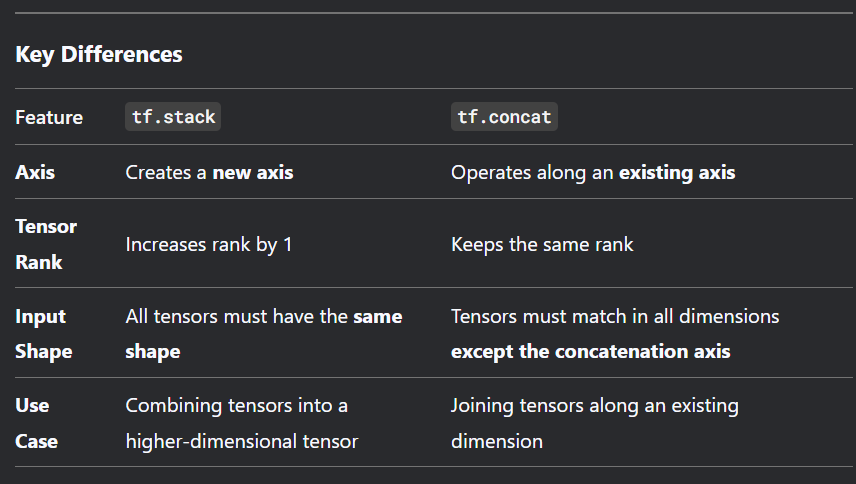
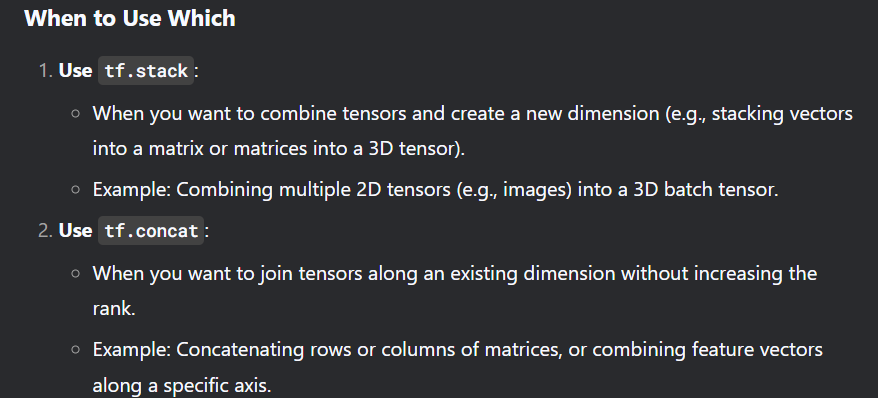
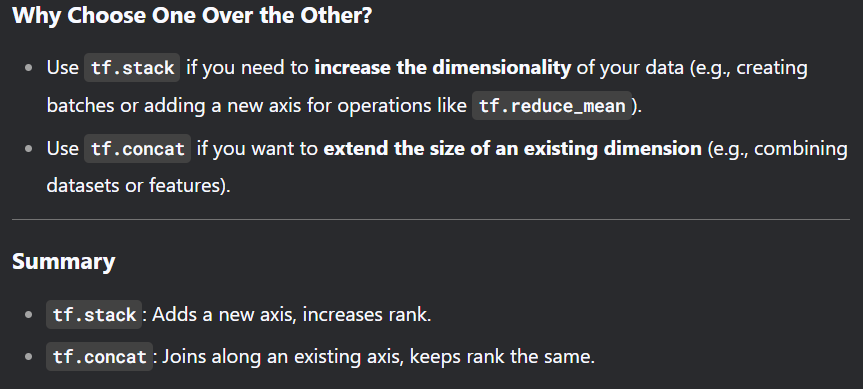

### Pad
Pads a tensor with zeros.
<p style="color":"red">This operation pads a input with zeros according to the paddings you specify. paddings is an integer tensor with shape [Dn, 2], where n is the rank of input. For each dimension D of input, paddings[D, 0] indicates how many zeros to add before the contents of input in that dimension, and paddings[D, 1] indicates how many zeros to add after the contents of input in that dimension.</p>

In [30]:
twoD=tf.constant([[1, 1], [2, 2]])
padding = [[1, 1], [2, 2]]
tf.pad(twoD,padding)

<tf.Tensor: shape=(4, 6), dtype=int32, numpy=
array([[0, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 0, 0],
       [0, 0, 2, 2, 0, 0],
       [0, 0, 0, 0, 0, 0]], dtype=int32)>

In [32]:
twoD = tf.constant([[1, 1], [2, 2]])
padding = [[1, 3], [3, 4]]
tf.pad(twoD, padding)

<tf.Tensor: shape=(6, 9), dtype=int32, numpy=
array([[0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 2, 2, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int32)>

### Gather
Gather slices from params according to indices
<p>indices must be an integer tensor of any dimension (usually 0-D or 1-D). Produces an output tensor with shape indices.shape + params.shape[1:]
</p>

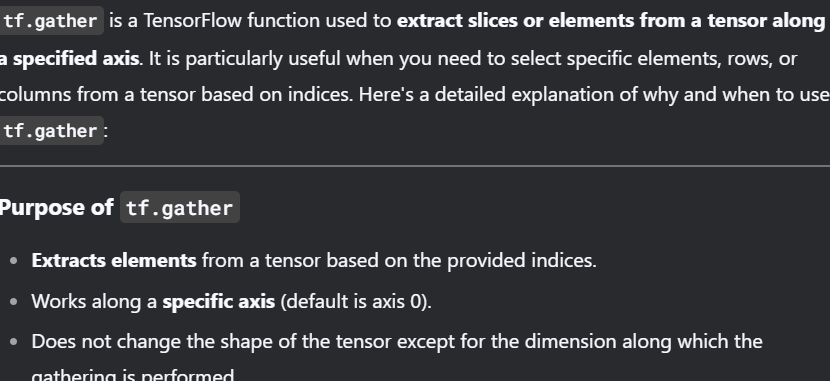
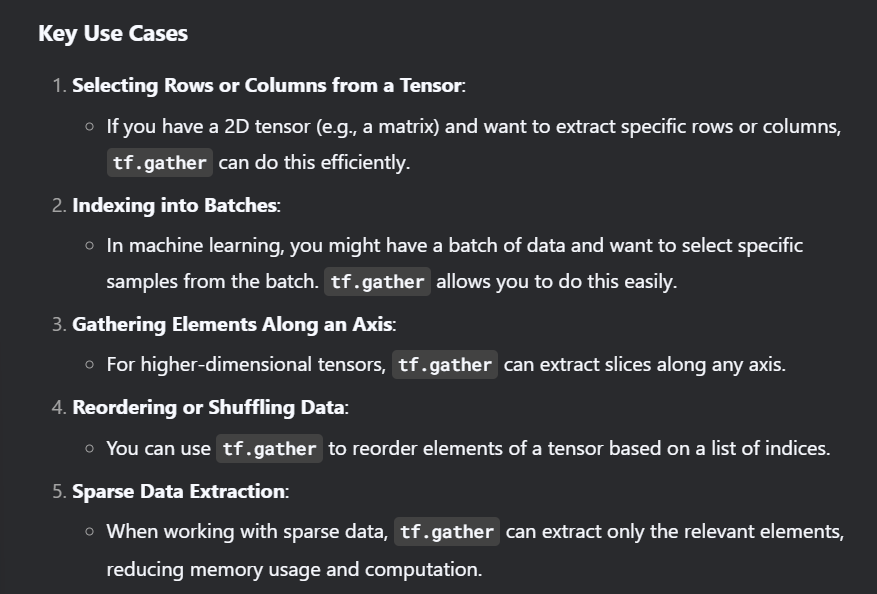
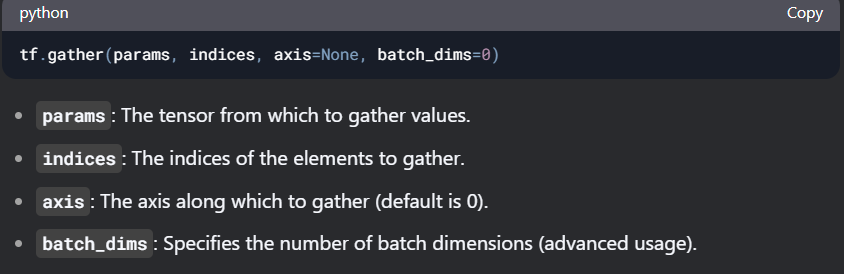

In [33]:
# 1. Gathering Rows from a 2D Tensor
import tensorflow as tf

# Create a 2D tensor (matrix)
tensor = tf.constant([[1, 2, 3],
                      [4, 5, 6],
                      [7, 8, 9]])

# Gather rows at indices 0 and 2
result = tf.gather(tensor, indices=[0, 2], axis=0)
print(result)

tf.Tensor(
[[1 2 3]
 [7 8 9]], shape=(2, 3), dtype=int32)


In [34]:
# 2. Gathering Columns from a 2D Tensor/
# Gather columns at indices 1 and 2
result = tf.gather(tensor, indices=[1, 2], axis=1)
print(result)

tf.Tensor(
[[2 3]
 [5 6]
 [8 9]], shape=(3, 2), dtype=int32)


In [35]:
# 3. Gathering Elements from a 1D Tensor
# Create a 1D tensor
tensor = tf.constant([10, 20, 30, 40, 50])

# Gather elements at indices 1, 3, and 4
result = tf.gather(tensor, indices=[1, 3, 4])
print(result)

tf.Tensor([20 40 50], shape=(3,), dtype=int32)


In [38]:
# 4. Gathering Along a Specific Axis in a 3D Tensor
# 4. Gathering Along a Specific Axis in a 3D Tensor
# Create a 3D tensor
tensor = tf.constant([[[1, 2], [3, 4]],
                      [[5, 6], [7, 8]],
                      [[9, 10], [11, 12]]])

# Gather slices along axis 1 at index 0
result = tf.gather(tensor, indices=[0], axis=1)
print(result)

tf.Tensor(
[[[ 1  2]]

 [[ 5  6]]

 [[ 9 10]]], shape=(3, 1, 2), dtype=int32)


In [41]:
# 4. Gathering Along a Specific Axis in a 3D Tensor
# Create a 3D tensor
tensor = tf.constant([[[1, 2], [3, 4]],
                      [[5, 6], [7, 8]],
                      [[9, 10], [11, 12]]])

# Gather slices along axis 1 at index 0
result = tf.gather(tensor, indices=[0][0], axis=0)
print(result)

tf.Tensor(
[[1 2]
 [3 4]], shape=(2, 2), dtype=int32)


In [42]:
# 4. Gathering Along a Specific Axis in a 3D Tensor
# Create a 3D tensor
tensor = tf.constant([[[1, 2], [3, 4]],
                      [[5, 6], [7, 8]],
                      [[9, 10], [11, 12]]])

# Gather slices along axis 1 at index 0
result = tf.gather(tensor, indices=[0][0], axis=1)
print(result)

tf.Tensor(
[[ 1  2]
 [ 5  6]
 [ 9 10]], shape=(3, 2), dtype=int32)


In [43]:
# 4. Gathering Along a Specific Axis in a 3D Tensor
# Create a 3D tensor
tensor = tf.constant([[[1, 2], [3, 4]],
                      [[5, 6], [7, 8]],
                      [[9, 10], [11, 12]]])

# Gather slices along axis 1 at index 0
result = tf.gather(tensor, indices=[0][0], axis=0)
print(result)

tf.Tensor(
[[1 2]
 [3 4]], shape=(2, 2), dtype=int32)


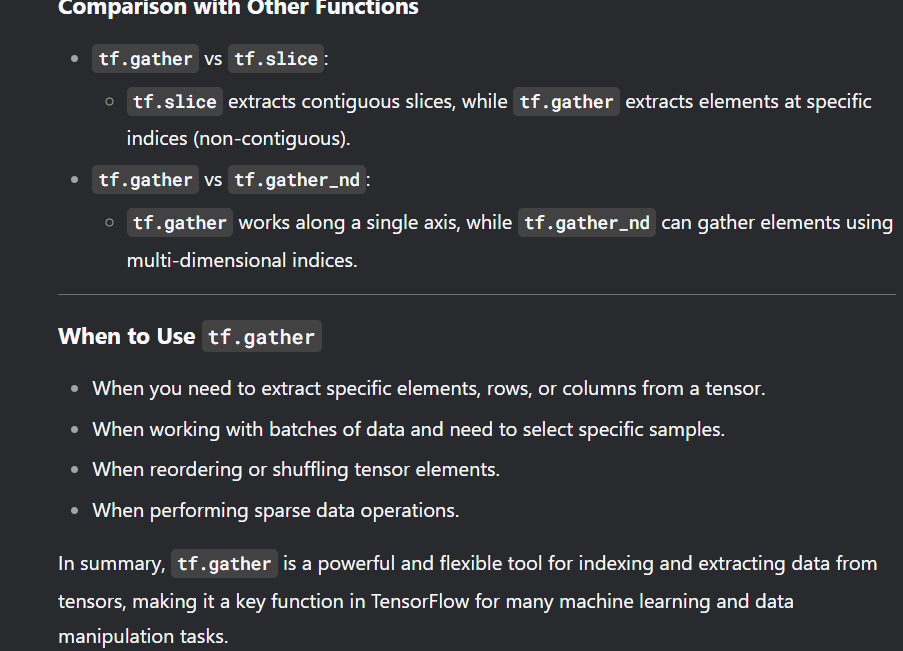

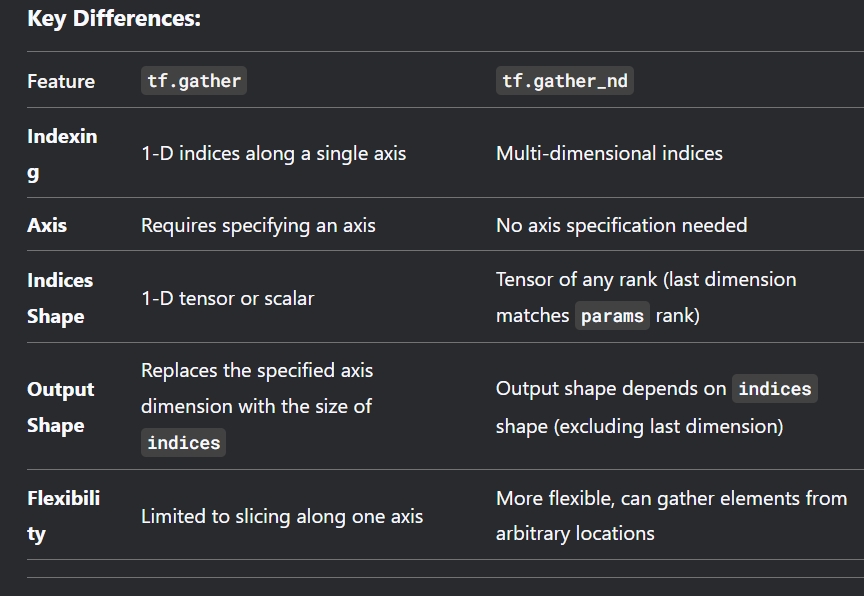

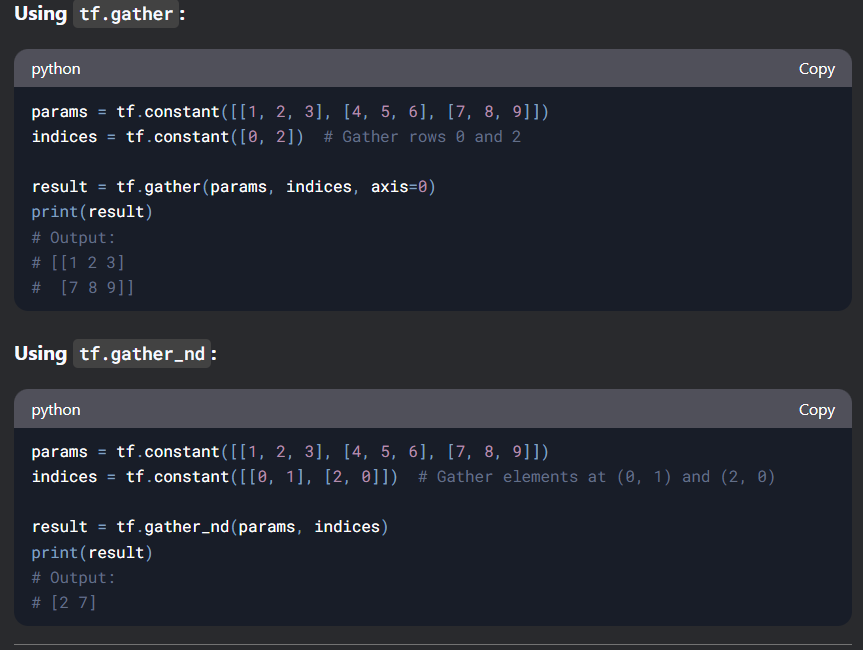

In [44]:
params = tf.constant([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
indices = tf.constant([[0, 2], [1, 2]])  # Gather elements at (0, 1) and (2, 0)

result = tf.gather_nd(params, indices)
print(result)
# Output:
# [2 7]

tf.Tensor([3 6], shape=(2,), dtype=int32)
